In [47]:
# Import all important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, roc_curve

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Main for ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# Load Dataset
dataset_path = '/content/drive/MyDrive/Colab_Notebooks/spam.csv'

df = pd.read_csv(dataset_path, encoding='latin1')
print("Dataset loaded successfully!")
display(df.head())

df = df[['v1','v2']]
df.columns = ['label','message']

df.head()


Dataset loaded successfully!


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


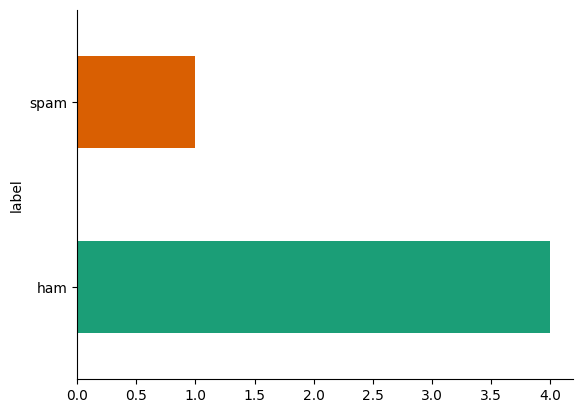

In [50]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [51]:
# Handle missing and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
print("After cleaning:", df.shape)

# Encode Labels (ham=0, spam=1)
label_enc = LabelEncoder()
df['label'] = label_enc.fit_transform(df['label'])

After cleaning: (5169, 2)


In [52]:
# Text Preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(msg):
    msg = msg.lower()
    msg = re.sub('[^a-zA-Z]', ' ', msg)        # remove symbols & numbers
    words = msg.split()
    words = [ps.stem(w) for w in words if w not in stop_words]
    return " ".join(words)

df['cleaned_message'] = df['message'].apply(clean_text)

print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   label                                            message  \
0      0  Go until jurong point, crazy.. Available only ...   
1      0                      Ok lar... Joking wif u oni...   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...   
3      0  U dun say so early hor... U c already then say...   
4      0  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri wkli comp win fa cup final tkt st m...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though  


In [53]:
# Convert Text → Numeric (Vectorization) -> TF-IDF performs feature normalization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['cleaned_message']
y = df['label']

tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(X).toarray()

print("TF-IDF Shape:", X_tfidf.shape)

TF-IDF Shape: (5169, 3000)


In [54]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

In [55]:
# Feature Scaling
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
# ANN Model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       384,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 392,449 (1.50 MB)

 Trainable params: 392,449 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
#Train Model
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=12,
    batch_size=64,
    callbacks=[es],
    verbose=1
)

Epoch 1/12
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7887 - loss: 0.5121 - val_accuracy: 0.9686 - val_loss: 0.1354
Epoch 2/12
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9792 - loss: 0.0926 - val_accuracy: 0.9819 - val_loss: 0.0769
Epoch 3/12
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9941 - loss: 0.0334 - val_accuracy: 0.9819 - val_loss: 0.0800
Epoch 4/12
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9952 - loss: 0.0172 - val_accuracy: 0.9807 - val_loss: 0.0852
Epoch 5/12
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9975 - loss: 0.0101 - val_accuracy: 0.9819 - val_loss: 0.0869


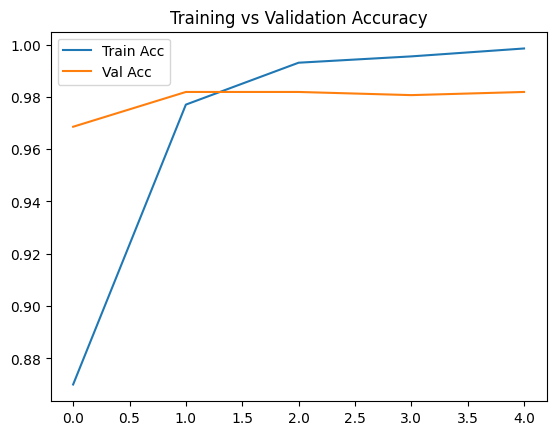

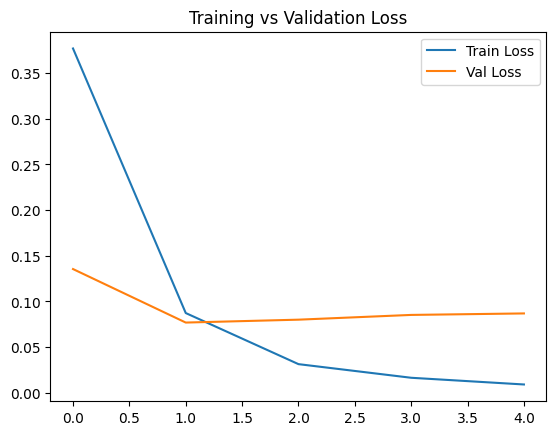

In [58]:
# Visualization
# Training vs Validation Accuracy
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

# Training vs Validation Loss
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
ANN MODEL PERFORMANCE
Accuracy: 0.9738878143133463
Precision: 0.9482758620689655
Recall: 0.8396946564885496
ROC-AUC: 0.9681215287464179


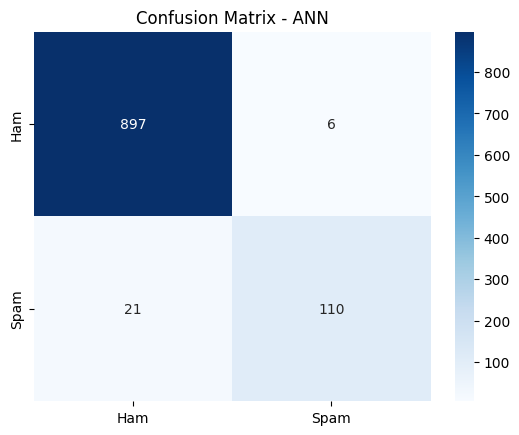

In [59]:
# Evaluate
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred_prob)

print("ANN MODEL PERFORMANCE")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC:", roc)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Ham','Spam'],
            yticklabels=['Ham','Spam'])
plt.title("Confusion Matrix - ANN")
plt.show()


In [60]:
# Compare with 3 Traditional ML Models: Logistic Regression, SVM, Random Forest

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier()
}

results = {}

for name, m in models.items():
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    prob = m.predict_proba(X_test)[:,1]

    results[name] = {
        "Accuracy": accuracy_score(y_test, pred),
        "Precision": precision_score(y_test, pred),
        "Recall": recall_score(y_test, pred),
        "ROC_AUC": roc_auc_score(y_test, prob)
    }

pd.DataFrame(results).T

,Accuracy,Precision,Recall,ROC_AUC
Logistic Regression,0.973888,0.933333,0.854962,0.984919
SVM,0.938104,1.000000,0.511450,0.988013
Random Forest,0.978723,0.982301,0.847328,0.991982


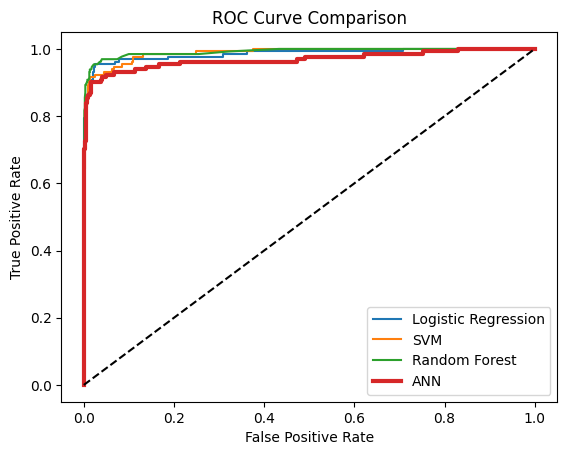

In [61]:
# ROC Comparision
plt.figure()

for name, m in models.items():
    prob = m.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, prob)
    plt.plot(fpr, tpr, label=name)

# ANN ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="ANN", linewidth=3)

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
